# Segmenting and Clustering Neighborhoods in Toronto

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

## Part 1. Obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
# Get url from wiki page and create soup object
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
url_text= requests.get(url).text
soup = BeautifulSoup(url_text, 'lxml')

In [3]:
# Build the code to scrape the following Wikipedia page
data = []
columns = []
canada_post = soup.find(class_='wikitable')
for index, tr in enumerate(canada_post.find_all('tr')):
    cell = []
    for td in tr.find_all(['th','td']):
        cell.append(td.text.rstrip())    
    #First row of data is the header
    if (index == 0):
        columns = cell
    else:
        data.append(cell)
# Create the DataFrame
df = pd.DataFrame(data = data,columns = columns)
# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df.head(12)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [4]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
df = df[df['Borough'] != 'Not assigned']
df.head(12)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [5]:
# More than one neighborhood can exist in one postal code area
df["Neighbourhood"] = df.groupby("Postcode")["Neighbourhood"].transform(lambda neigh: ', '.join(neigh))

# Remove duplicates
df = df.drop_duplicates()
df.head(12)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Harbourfront, Regent Park"
6,M6A,North York,"Lawrence Heights, Lawrence Manor"
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,"Rouge, Malvern"
14,M3B,North York,Don Mills North
15,M4B,East York,"Woodbine Gardens, Parkview Hill"
17,M5B,Downtown Toronto,"Ryerson, Garden District"


In [6]:
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
df['Neighbourhood'].replace("Not assigned", df["Borough"],inplace=True)
df = df.reset_index(drop=True)
df.head(12)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [7]:
# Use the .shape method to print the number of rows of your dataframe
df.shape

(103, 3)

## Part 2. Use the Geocoder package or the csv file to get the geographical coordinates of the neighborhoods

In [8]:
#reading the file to coord dataframe
df['Latitude'] = ''
df['Longitude'] = ''
geo_coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,,
1,M4A,North York,Victoria Village,,
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",,
3,M6A,North York,"Lawrence Heights, Lawrence Manor",,
4,M7A,Queen's Park,Queen's Park,,


In [9]:
#merging dataframe that contain coordinates with the one that contains borough names
for i in df.index:
    for j in geo_coordinates.index:
        if df.iloc[i, 0] == geo_coordinates.iloc[j, 0]:
            df.iloc[i, 3] = geo_coordinates.iloc[j, 1]
            df.iloc[i, 4] = geo_coordinates.iloc[j, 2]
#checking the results            
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7533,-79.3297
1,M4A,North York,Victoria Village,43.7259,-79.3156
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.6543,-79.3606
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.7185,-79.4648
4,M7A,Queen's Park,Queen's Park,43.6623,-79.3895


## Part 3. Explore and cluster the neighborhoods in Toronto

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

1. add enough Markdown cells to explain what you decided to do and to report any observations you make.
2. generate maps to visualize your neighborhoods and how they cluster together.

In [10]:
# You can decide to work with only boroughs that contain the word Toronto 
toronto_data = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
toronto_data.head(12)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.6543,-79.3606
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.6572,-79.3789
2,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754
3,M5E,Downtown Toronto,Berczy Park,43.6448,-79.3733
4,M5G,Downtown Toronto,Central Bay Street,43.658,-79.3874
5,M6G,Downtown Toronto,Christie,43.6695,-79.4226
6,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.6506,-79.3846
7,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.6408,-79.3818
8,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.6472,-79.3816
9,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.6482,-79.3798


In [11]:
#geocoders
from geopy.geocoders import Nominatim
#get the coordinates for Toronto
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [12]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Toronto. So let's slice the original dataframe and create a new dataframe of the Toronto data.

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'KVHRH3GNQEDO0ZD4QGBMVVTECINSXMLKIC4NAKITAT1BVEQ0' # your Foursquare ID
CLIENT_SECRET = 'OLDPBX11WOOA0AOY2EGWSVSEQUH45N3EBL1JQ42RTUCPM4IS' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KVHRH3GNQEDO0ZD4QGBMVVTECINSXMLKIC4NAKITAT1BVEQ0
CLIENT_SECRET:OLDPBX11WOOA0AOY2EGWSVSEQUH45N3EBL1JQ42RTUCPM4IS


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [14]:
toronto_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.6543,-79.3606
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.6572,-79.3789
2,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754
3,M5E,Downtown Toronto,Berczy Park,43.6448,-79.3733
4,M5G,Downtown Toronto,Central Bay Street,43.658,-79.3874


In [15]:
toronto_data.loc[0, 'Neighbourhood']

'Harbourfront, Regent Park'

Get the neighborhood's latitude and longitude values.

In [16]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbourfront, Regent Park are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Harbourfront, Regent Park within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KVHRH3GNQEDO0ZD4QGBMVVTECINSXMLKIC4NAKITAT1BVEQ0&client_secret=OLDPBX11WOOA0AOY2EGWSVSEQUH45N3EBL1JQ42RTUCPM4IS&v=20180604&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cef510a9fb6b7757fc1d165'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54ea41ad498e9a11e9e13308-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'primary': True,
         'shortName': 'Bakery'}],
       'id': '54ea41ad498e9a11e9e13308',
       'location': {'address': '362 King St E',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Trinity St',
        'distance': 143,
        'formattedAddress': ['362 King St E (Trinity St)',
         'Toronto ON M5A 1K9',
         'Canada'],
        'labeledLatLngs': [{'label': 'display',
 

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
import json # library to handle JSON files values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Toronto Cooper Koo Family Cherry St YMCA Centre,Gym / Fitness Center,43.653191,-79.357947
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [23]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
First Canadian Place, Underground city
Church and Wellesley


In [24]:
print(toronto_venues.shape)
toronto_venues.head()

(1284, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront, Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's check how many venues were returned for each neighborhood

In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",15,15,15,15,15,15
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,87,87,87,87,87,87
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,86,86,86,86,86,86
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 207 uniques categories.


## 3. Analyze Each Neighborhood

In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# And let's examine the new dataframe size.
toronto_onehot.shape

(1284, 207)

In [29]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.00
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.018182,0.000000,0.000000,0.000000,0.000000,0.00
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.2,0.133333,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Central Bay Street,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.011494,0.000000,0.000000,0.011494,0.000000,0.00
5,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.01,0.01,0.00,0.00,0.060000,0.000000,0.030000,0.010000,0.000000,0.00
6,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Church and Wellesley,0.011628,0.011628,0.011628,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.000000,0.011628,0.011628,0.000000,0.011628,0.00
8,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.00
9,"Design Exchange, Toronto Dominion Centre",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000,0.00


In [30]:
#checking the grouped dataframe size
toronto_grouped.shape

(18, 207)

In [31]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2  American Restaurant  0.04
3           Steakhouse  0.04
4                  Bar  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2    Restaurant  0.04
3      Beer Bar  0.04
4          Café  0.04


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.20
1  Airport Terminal  0.13
2    Airport Lounge  0.13
3          Boutique  0.07
4             Plane  0.07


----Cabbagetown, St. James Town----
         venue  freq
0  Coffee Shop  0.09
1         Park  0.07
2  Pizza Place  0.04
3          Pub  0.04
4         Café  0.04


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.16
1                Café  0.06
2  Italian Restaurant  0.05
3        Burger Joint  0.03
4      Sandwich Place  0.03


---

In [32]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
#create the new dataframe and display the top 10 venues for each neighborhood:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,American Restaurant,Thai Restaurant,Steakhouse,Cosmetics Shop,Bakery,Hotel,Burger Joint
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Italian Restaurant,Farmers Market,Steakhouse,Seafood Restaurant,Beer Bar,Bakery,Restaurant
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Airport Gate,Boat or Ferry,Plane,Harbor / Marina,Airport Food Court,Airport,Boutique
3,"Cabbagetown, St. James Town",Coffee Shop,Park,Market,Pizza Place,Café,Italian Restaurant,Bakery,Pub,Restaurant,Jewelry Store
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Bubble Tea Shop,Bar,Bakery,Spa


## 4. Cluster Neighborhoods

In [34]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [35]:
# Run *k*-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 4, 0, 0, 3, 2, 0, 0, 0], dtype=int32)

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge downtown_grouped with toronto data to add latitude/longitude for each neighborhood
# I realized that I've misspelled the NeighboUrhood column name in Toronto dataframe. oops...
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.6543,-79.3606,0,Coffee Shop,Bakery,Pub,Park,Mexican Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Restaurant
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.6572,-79.3789,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Fast Food Restaurant,Sporting Goods Shop,Bubble Tea Shop,Pizza Place,Japanese Restaurant
2,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754,0,Coffee Shop,Café,Hotel,Restaurant,Cosmetics Shop,Clothing Store,Bakery,Breakfast Spot,Gastropub,Beer Bar
3,M5E,Downtown Toronto,Berczy Park,43.6448,-79.3733,0,Coffee Shop,Cocktail Bar,Café,Italian Restaurant,Farmers Market,Steakhouse,Seafood Restaurant,Beer Bar,Bakery,Restaurant
4,M5G,Downtown Toronto,Central Bay Street,43.658,-79.3874,0,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Bubble Tea Shop,Bar,Bakery,Spa


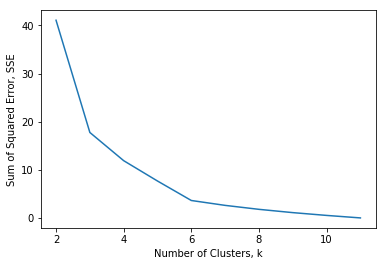

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 12):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 1000).fit(toronto_grouped_clustering)
    toronto_grouped_clustering["Labels"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
plt.show()

When we checked the elbow method, we can conclude that the best number of k is 5.

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [38]:
#Cluster 1
toronto_merged.loc[toronto_merged['Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Pub,Park,Mexican Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Restaurant
1,Downtown Toronto,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Fast Food Restaurant,Sporting Goods Shop,Bubble Tea Shop,Pizza Place,Japanese Restaurant
2,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Cosmetics Shop,Clothing Store,Bakery,Breakfast Spot,Gastropub,Beer Bar
3,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Café,Italian Restaurant,Farmers Market,Steakhouse,Seafood Restaurant,Beer Bar,Bakery,Restaurant
4,Downtown Toronto,0,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Bubble Tea Shop,Bar,Bakery,Spa
6,Downtown Toronto,0,Coffee Shop,Café,Bar,American Restaurant,Thai Restaurant,Steakhouse,Cosmetics Shop,Bakery,Hotel,Burger Joint
7,Downtown Toronto,0,Coffee Shop,Hotel,Aquarium,Italian Restaurant,Café,Brewery,Fried Chicken Joint,Scenic Lookout,Bakery,Restaurant
8,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Steakhouse,Gastropub,Bakery,Seafood Restaurant,American Restaurant
9,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,American Restaurant,Seafood Restaurant,Gastropub,Bakery,Steakhouse,Deli / Bodega
14,Downtown Toronto,0,Coffee Shop,Restaurant,Café,Beer Bar,Seafood Restaurant,Hotel,Cocktail Bar,Italian Restaurant,Fast Food Restaurant,Bakery


In [39]:
#Cluster 2
toronto_merged.loc[toronto_merged['Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,1,Park,Playground,Trail,Women's Store,Dance Studio,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [40]:
#Cluster 3
toronto_merged.loc[toronto_merged['Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Downtown Toronto,2,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Convenience Store,Restaurant,Baby Store


In [41]:
#Cluster 4
toronto_merged.loc[toronto_merged['Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,3,Café,Italian Restaurant,Bar,Japanese Restaurant,Bookstore,Restaurant,Bakery,Pub,Beer Bar,Sandwich Place
11,Downtown Toronto,3,Café,Vegetarian / Vegan Restaurant,Bar,Bakery,Dumpling Restaurant,Mexican Restaurant,Coffee Shop,Vietnamese Restaurant,Chinese Restaurant,Caribbean Restaurant


In [42]:
#Cluster 5
toronto_merged.loc[toronto_merged['Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Downtown Toronto,4,Airport Service,Airport Terminal,Airport Lounge,Airport Gate,Boat or Ferry,Plane,Harbor / Marina,Airport Food Court,Airport,Boutique


WE CAN CONCLUDE THAT:
1. Cluster 1: the most common venue type is Coffee Shop. This area is a commercial place and center activity.
2. Cluster 2: the most common venue type is Park. This group is an outskirt residential area with parks.
3. Cluster 3: the most common venue type is Grocery Store. This cluster is a residential area.
4. Cluster 4: the most common venue type is Café. This cluster is a residential area with Café.
5. Cluster 5: the most common venue type is Airport Service. This cluster is related with the airport area.
The most popular venue type in Downtown Toronto is Coffee Shop (Number: 12).